#### The Final Voting Classifier Model which includes KNN and Random Forest Classifiers and produces an Accuracy of 87% on unseen data and 97% after training.

In [2]:
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import lightgbm as lgb
from lightgbm import *
import xgboost as xgb
from xgboost import XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN 
import warnings

warnings.filterwarnings('ignore') 
seed = 123

col = [
    "left_palm_position_x",
"left_palm_position_y",
"left_palm_position_z",
"left_palm_normal_x",
"left_palm_normal_y",
"left_palm_normal_z",
"left_hand_direction_x",
"left_hand_direction_y",
"left_hand_direction_z",
"left_palm_velocity_x",
"left_palm_velocity_y",
"left_palm_velocity_z",
"left_hand_pitch",
"left_hand_roll",
"left_hand_yaw",
"left_arm_direction_x",
"left_arm_direction_y",
"left_arm_direction_z",
"left_wrist_position_x",
"left_wrist_position_y",
"left_wrist_position_z",
"left_elbow_position_x",
"left_elbow_position_y",
"left_elbow_position_z",
"left_thumb_length",
"left_thumb_width",
"left_thumb_metacarpal_start_x",
"left_thumb_metacarpal_start_y",
"left_thumb_metacarpal_start_z",
"left_thumb_metacarpal_end_x",
"left_thumb_metacarpal_end_y",
"left_thumb_metacarpal_end_z",
"left_thumb_metacarpal_direction_x",
"left_thumb_metacarpal_direction_y",
"left_thumb_metacarpal_direction_z",
"left_thumb_proximal_start_x",
"left_thumb_proximal_start_y",
"left_thumb_proximal_start_z",
"left_thumb_proximal_end_x",
"left_thumb_proximal_end_y",
"left_thumb_proximal_end_z",
"left_thumb_proximal_direction_x",
"left_thumb_proximal_direction_y",
"left_thumb_proximal_direction_z",
"left_thumb_intermediate_start_x",
"left_thumb_intermediate_start_y",
"left_thumb_intermediate_start_z",
"left_thumb_intermediate_end_x",
"left_thumb_intermediate_end_y",
"left_thumb_intermediate_end_z",
"left_thumb_intermediate_direction_x",
"left_thumb_intermediate_direction_y",
"left_thumb_intermediate_direction_z",
"left_thumb_distal_start_x",
"left_thumb_distal_start_y",
"left_thumb_distal_start_z",
"left_thumb_distal_end_x",
"left_thumb_distal_end_y",
"left_thumb_distal_end_z",
"left_thumb_distal_direction_x",
"left_thumb_distal_direction_y",
"left_thumb_distal_direction_z",
"left_index_length",
"left_index_width",
"left_index_metacarpal_start_x",
"left_index_metacarpal_start_y",
"left_index_metacarpal_start_z",
"left_index_metacarpal_end_x",
"left_index_metacarpal_end_y",
"left_index_metacarpal_end_z",
"left_index_metacarpal_direction_x",
"left_index_metacarpal_direction_y",
"left_index_metacarpal_direction_z",
"left_index_proximal_start_x",
"left_index_proximal_start_y",
"left_index_proximal_start_z",
"left_index_proximal_end_x",
"left_index_proximal_end_y",
"left_index_proximal_end_z",
"left_index_proximal_direction_x",
"left_index_proximal_direction_y",
"left_index_proximal_direction_z",
"left_index_intermediate_start_x",
"left_index_intermediate_start_y",
"left_index_intermediate_start_z",
"left_index_intermediate_end_x",
"left_index_intermediate_end_y",
"left_index_intermediate_end_z",
"left_index_intermediate_direction_x",
"left_index_intermediate_direction_y",
"left_index_intermediate_direction_z",
"left_index_distal_start_x",
"left_index_distal_start_y",
"left_index_distal_start_z",
"left_index_distal_end_x",
"left_index_distal_end_y",
"left_index_distal_end_z",
"left_index_distal_direction_x",
"left_index_distal_direction_y",
"left_index_distal_direction_z",
"left_middle_length",
"left_middle_width",
"left_middle_metacarpal_start_x",
"left_middle_metacarpal_start_y",
"left_middle_metacarpal_start_z",
"left_middle_metacarpal_end_x",
"left_middle_metacarpal_end_y",
"left_middle_metacarpal_end_z",
"left_middle_metacarpal_direction_x",
"left_middle_metacarpal_direction_y",
"left_middle_metacarpal_direction_z",
"left_middle_proximal_start_x",
"left_middle_proximal_start_y",
"left_middle_proximal_start_z",
"left_middle_proximal_end_x",
"left_middle_proximal_end_y",
"left_middle_proximal_end_z",
"left_middle_proximal_direction_x",
"left_middle_proximal_direction_y",
"left_middle_proximal_direction_z",
"left_middle_intermediate_start_x",
"left_middle_intermediate_start_y",
"left_middle_intermediate_start_z",
"left_middle_intermediate_end_x",
"left_middle_intermediate_end_y",
"left_middle_intermediate_end_z",
"left_middle_intermediate_direction_x",
"left_middle_intermediate_direction_y",
"left_middle_intermediate_direction_z",
"left_middle_distal_start_x",
"left_middle_distal_start_y",
"left_middle_distal_start_z",
"left_middle_distal_end_x",
"left_middle_distal_end_y",
"left_middle_distal_end_z",
"left_middle_distal_direction_x",
"left_middle_distal_direction_y",
"left_middle_distal_direction_z",
"left_ring_length",
"left_ring_width",
"left_ring_metacarpal_start_x",
"left_ring_metacarpal_start_y",
"left_ring_metacarpal_start_z",
"left_ring_metacarpal_end_x",
"left_ring_metacarpal_end_y",
"left_ring_metacarpal_end_z",
"left_ring_metacarpal_direction_x",
"left_ring_metacarpal_direction_y",
"left_ring_metacarpal_direction_z",
"left_ring_proximal_start_x",
"left_ring_proximal_start_y",
"left_ring_proximal_start_z",
"left_ring_proximal_end_x",
"left_ring_proximal_end_y",
"left_ring_proximal_end_z",
"left_ring_proximal_direction_x",
"left_ring_proximal_direction_y",
"left_ring_proximal_direction_z",
"left_ring_intermediate_start_x",
"left_ring_intermediate_start_y",
"left_ring_intermediate_start_z",
"left_ring_intermediate_end_x",
"left_ring_intermediate_end_y",
"left_ring_intermediate_end_z",
"left_ring_intermediate_direction_x",
"left_ring_intermediate_direction_y",
"left_ring_intermediate_direction_z",
"left_ring_distal_start_x",
"left_ring_distal_start_y",
"left_ring_distal_start_z",
"left_ring_distal_end_x",
"left_ring_distal_end_y",
"left_ring_distal_end_z",
"left_ring_distal_direction_x",
"left_ring_distal_direction_y",
"left_ring_distal_direction_z",
"left_pinky_length",
"left_pinky_width",
"left_pinky_metacarpal_start_x",
"left_pinky_metacarpal_start_y",
"left_pinky_metacarpal_start_z",
"left_pinky_metacarpal_end_x",
"left_pinky_metacarpal_end_y",
"left_pinky_metacarpal_end_z",
"left_pinky_metacarpal_direction_x",
"left_pinky_metacarpal_direction_y",
"left_pinky_metacarpal_direction_z",
"left_pinky_proximal_start_x",
"left_pinky_proximal_start_y",
"left_pinky_proximal_start_z",
"left_pinky_proximal_end_x",
"left_pinky_proximal_end_y",
"left_pinky_proximal_end_z",
"left_pinky_proximal_direction_x",
"left_pinky_proximal_direction_y",
"left_pinky_proximal_direction_z",
"left_pinky_intermediate_start_x",
"left_pinky_intermediate_start_y",
"left_pinky_intermediate_start_z",
"left_pinky_intermediate_end_x",
"left_pinky_intermediate_end_y",
"left_pinky_intermediate_end_z",
"left_pinky_intermediate_direction_x",
"left_pinky_intermediate_direction_y",
"left_pinky_intermediate_direction_z",
"left_pinky_distal_start_x",
"left_pinky_distal_start_y",
"left_pinky_distal_start_z",
"left_pinky_distal_end_x",
"left_pinky_distal_end_y",
"left_pinky_distal_end_z",
"left_pinky_distal_direction_x",
"left_pinky_distal_direction_y",
"left_pinky_distal_direction_z",
"right_palm_position_x",
"right_palm_position_y",
"right_palm_position_z",
"right_palm_normal_x",
"right_palm_normal_y",
"right_palm_normal_z",
"right_hand_direction_x",
"right_hand_direction_y",
"right_hand_direction_z",
"right_palm_velocity_x",
"right_palm_velocity_y",
"right_palm_velocity_z",
"right_hand_pitch",
"right_hand_roll",
"right_hand_yaw",
"right_arm_direction_x",
"right_arm_direction_y",
"right_arm_direction_z",
"right_wrist_position_x",
"right_wrist_position_y",
"right_wrist_position_z",
"right_elbow_position_x",
"right_elbow_position_y",
"right_elbow_position_z",
"right_thumb_length",
"right_thumb_width",
"right_thumb_metacarpal_start_x",
"right_thumb_metacarpal_start_y",
"right_thumb_metacarpal_start_z",
"right_thumb_metacarpal_end_x",
"right_thumb_metacarpal_end_y",
"right_thumb_metacarpal_end_z",
"right_thumb_metacarpal_direction_x",
"right_thumb_metacarpal_direction_y",
"right_thumb_metacarpal_direction_z",
"right_thumb_proximal_start_x",
"right_thumb_proximal_start_y",
"right_thumb_proximal_start_z",
"right_thumb_proximal_end_x",
"right_thumb_proximal_end_y",
"right_thumb_proximal_end_z",
"right_thumb_proximal_direction_x",
"right_thumb_proximal_direction_y",
"right_thumb_proximal_direction_z",
"right_thumb_intermediate_start_x",
"right_thumb_intermediate_start_y",
"right_thumb_intermediate_start_z",
"right_thumb_intermediate_end_x",
"right_thumb_intermediate_end_y",
"right_thumb_intermediate_end_z",
"right_thumb_intermediate_direction_x",
"right_thumb_intermediate_direction_y",
"right_thumb_intermediate_direction_z",
"right_thumb_distal_start_x",
"right_thumb_distal_start_y",
"right_thumb_distal_start_z",
"right_thumb_distal_end_x",
"right_thumb_distal_end_y",
"right_thumb_distal_end_z",
"right_thumb_distal_direction_x",
"right_thumb_distal_direction_y",
"right_thumb_distal_direction_z",
"right_index_length",
"right_index_width",
"right_index_metacarpal_start_x",
"right_index_metacarpal_start_y",
"right_index_metacarpal_start_z",
"right_index_metacarpal_end_x",
"right_index_metacarpal_end_y",
"right_index_metacarpal_end_z",
"right_index_metacarpal_direction_x",
"right_index_metacarpal_direction_y",
"right_index_metacarpal_direction_z",
"right_index_proximal_start_x",
"right_index_proximal_start_y",
"right_index_proximal_start_z",
"right_index_proximal_end_x",
"right_index_proximal_end_y",
"right_index_proximal_end_z",
"right_index_proximal_direction_x",
"right_index_proximal_direction_y",
"right_index_proximal_direction_z",
"right_index_intermediate_start_x",
"right_index_intermediate_start_y",
"right_index_intermediate_start_z",
"right_index_intermediate_end_x",
"right_index_intermediate_end_y",
"right_index_intermediate_end_z",
"right_index_intermediate_direction_x",
"right_index_intermediate_direction_y",
"right_index_intermediate_direction_z",
"right_index_distal_start_x",
"right_index_distal_start_y",
"right_index_distal_start_z",
"right_index_distal_end_x",
"right_index_distal_end_y",
"right_index_distal_end_z",
"right_index_distal_direction_x",
"right_index_distal_direction_y",
"right_index_distal_direction_z",
"right_middle_length",
"right_middle_width",
"right_middle_metacarpal_start_x",
"right_middle_metacarpal_start_y",
"right_middle_metacarpal_start_z",
"right_middle_metacarpal_end_x",
"right_middle_metacarpal_end_y",
"right_middle_metacarpal_end_z",
"right_middle_metacarpal_direction_x",
"right_middle_metacarpal_direction_y",
"right_middle_metacarpal_direction_z",
"right_middle_proximal_start_x",
"right_middle_proximal_start_y",
"right_middle_proximal_start_z",
"right_middle_proximal_end_x",
"right_middle_proximal_end_y",
"right_middle_proximal_end_z",
"right_middle_proximal_direction_x",
"right_middle_proximal_direction_y",
"right_middle_proximal_direction_z",
"right_middle_intermediate_start_x",
"right_middle_intermediate_start_y",
"right_middle_intermediate_start_z",
"right_middle_intermediate_end_x",
"right_middle_intermediate_end_y",
"right_middle_intermediate_end_z",
"right_middle_intermediate_direction_x",
"right_middle_intermediate_direction_y",
"right_middle_intermediate_direction_z",
"right_middle_distal_start_x",
"right_middle_distal_start_y",
"right_middle_distal_start_z",
"right_middle_distal_end_x",
"right_middle_distal_end_y",
"right_middle_distal_end_z",
"right_middle_distal_direction_x",
"right_middle_distal_direction_y",
"right_middle_distal_direction_z",
"right_ring_length",
"right_ring_width",
"right_ring_metacarpal_start_x",
"right_ring_metacarpal_start_y",
"right_ring_metacarpal_start_z",
"right_ring_metacarpal_end_x",
"right_ring_metacarpal_end_y",
"right_ring_metacarpal_end_z",
"right_ring_metacarpal_direction_x",
"right_ring_metacarpal_direction_y",
"right_ring_metacarpal_direction_z",
"right_ring_proximal_start_x",
"right_ring_proximal_start_y",
"right_ring_proximal_start_z",
"right_ring_proximal_end_x",
"right_ring_proximal_end_y",
"right_ring_proximal_end_z",
"right_ring_proximal_direction_x",
"right_ring_proximal_direction_y",
"right_ring_proximal_direction_z",
"right_ring_intermediate_start_x",
"right_ring_intermediate_start_y",
"right_ring_intermediate_start_z",
"right_ring_intermediate_end_x",
"right_ring_intermediate_end_y",
"right_ring_intermediate_end_z",
"right_ring_intermediate_direction_x",
"right_ring_intermediate_direction_y",
"right_ring_intermediate_direction_z",
"right_ring_distal_start_x",
"right_ring_distal_start_y",
"right_ring_distal_start_z",
"right_ring_distal_end_x",
"right_ring_distal_end_y",
"right_ring_distal_end_z",
"right_ring_distal_direction_x",
"right_ring_distal_direction_y",
"right_ring_distal_direction_z",
"right_pinky_length",
"right_pinky_width",
"right_pinky_metacarpal_start_x",
"right_pinky_metacarpal_start_y",
"right_pinky_metacarpal_start_z",
"right_pinky_metacarpal_end_x",
"right_pinky_metacarpal_end_y",
"right_pinky_metacarpal_end_z",
"right_pinky_metacarpal_direction_x",
"right_pinky_metacarpal_direction_y",
"right_pinky_metacarpal_direction_z",
"right_pinky_proximal_start_x",
"right_pinky_proximal_start_y",
"right_pinky_proximal_start_z",
"right_pinky_proximal_end_x",
"right_pinky_proximal_end_y",
"right_pinky_proximal_end_z",
"right_pinky_proximal_direction_x",
"right_pinky_proximal_direction_y",
"right_pinky_proximal_direction_z",
"right_pinky_intermediate_start_x",
"right_pinky_intermediate_start_y",
"right_pinky_intermediate_start_z",
"right_pinky_intermediate_end_x",
"right_pinky_intermediate_end_y",
"right_pinky_intermediate_end_z",
"right_pinky_intermediate_direction_x",
"right_pinky_intermediate_direction_y",
"right_pinky_intermediate_direction_z",
"right_pinky_distal_start_x",
"right_pinky_distal_start_y",
"right_pinky_distal_start_z",
"right_pinky_distal_end_x",
"right_pinky_distal_end_y",
"right_pinky_distal_end_z",
"right_pinky_distal_direction_x",
"right_pinky_distal_direction_y",
"right_pinky_distal_direction_z",
"label"
]


#### Reading in the dataset and splitting it accordingly into its X and y. X values are scaled and y values are encoded.

+ df = Dataframe which contains the training dataset values and their columns
+ X = Features in the training dataset which are used to predict the targets
+ y = Classes/Targets in the training dataset which are to be predicted
+ y_encoded = the encoded y variable
+ min_max_scaler = Scales all feature values so that they are within the same range of 0 to 1 (normalising them)
+ le = Label Encoder used to encode the categorical values of the target
+ ohe = One Hot Encoder used to encode the categorical values of the target


In [3]:
df = pd.read_csv("../Study's Main Raw Datasets/TrainingData.csv", names=col)                  
df = pd.DataFrame(df.sample(frac=1, random_state=seed).reset_index(drop=True))
min_max_scaler = preprocessing.MinMaxScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
le = LabelEncoder()

X = df.iloc[:, :-1].values 
X = min_max_scaler.fit_transform(X)

y = df.iloc[:, -1:]  
y_encoded = le.fit_transform(y)
y = y.values.ravel()
df.iloc[:, -1:] = le.fit_transform(df.iloc[:, -1:]) 


#### Initialisation of evaluation technique:
+ kf = K-fold cross validation

#### Initialisation of classifiers:
+ rf = Random forest Classifier
+ knn = K-Nearest Neighbour Classifier

#### Initialisation of lists which contain classifier scores:
+ rfScore = A list of every random forest score that is obtained in each fold of the cross validation technique
+ knnScore = A list of every KNN score that is obtained in each fold of the cross validation technique


In [5]:
kf = KFold(n_splits=10, random_state=seed, shuffle=True)
rf = RandomForestClassifier(random_state=seed)
knn = KNeighborsClassifier(n_neighbors=11)

rfScore = []
knnScore = []


#### Check if any of the features have null values in them:

In [ ]:
df.isnull().any().any()

# 
# 
# The features which are highly correlated should be removed 
This helps to prevent overfitting as classifiers are then trained with features which are more independant of one another. The correlation values of the features can be seen below: 
+ corr = the levels of correltion for each feature
+ corr_matrix = The ordered version of correlations 

In [4]:
corr = df.corr().abs()
corr_matrix = corr["label"].sort_values(ascending=False)
print(corr_matrix.head(302))


label                                  1.000000
left_pinky_length                      0.872476
left_ring_length                       0.871277
left_middle_length                     0.870271
left_pinky_width                       0.869965
                                         ...   
right_middle_metacarpal_direction_x    0.202504
right_thumb_metacarpal_direction_x     0.202504
right_index_metacarpal_direction_x     0.202504
right_ring_metacarpal_direction_x      0.202504
right_middle_distal_end_z              0.198888
Name: label, Length: 302, dtype: float64


#### The following step returns how many features are to be dropped from the dataframe along with the names of the features which are included within this number:

+ droppingColumns = A list which contains all of the columns in the dataframe which have a correlation value above a specified threshold 

<font color='red'> **Change the value below of 0.2 (the level of correlation) to determine how many features need to be removed** </font>

In [5]:
droppingColumns=[]

for cols in df.columns:
    if(corr_matrix[cols] > 0.2):
        droppingColumns.append(cols) 
        
print('Number of columns that need to be dropped:', (len(droppingColumns)), "\n")
droppingColumns


Number of columns that need to be dropped: 301 



['left_palm_position_x',
 'left_palm_position_y',
 'left_palm_position_z',
 'left_palm_normal_x',
 'left_hand_direction_z',
 'left_hand_roll',
 'left_arm_direction_x',
 'left_arm_direction_y',
 'left_arm_direction_z',
 'left_wrist_position_x',
 'left_wrist_position_y',
 'left_wrist_position_z',
 'left_elbow_position_x',
 'left_elbow_position_y',
 'left_elbow_position_z',
 'left_thumb_length',
 'left_thumb_width',
 'left_thumb_metacarpal_start_x',
 'left_thumb_metacarpal_start_y',
 'left_thumb_metacarpal_start_z',
 'left_thumb_metacarpal_end_x',
 'left_thumb_metacarpal_end_y',
 'left_thumb_metacarpal_end_z',
 'left_thumb_metacarpal_direction_z',
 'left_thumb_proximal_start_x',
 'left_thumb_proximal_start_y',
 'left_thumb_proximal_start_z',
 'left_thumb_proximal_end_x',
 'left_thumb_proximal_end_y',
 'left_thumb_proximal_direction_z',
 'left_thumb_intermediate_start_x',
 'left_thumb_intermediate_start_y',
 'left_thumb_intermediate_end_x',
 'left_thumb_intermediate_end_y',
 'left_thumb_in

#### Each of the columns within the dataframe that are also present within the 'droppingColumns' list are dropped when the next step is processed before outputting the updated dataframe and its shape:

In [6]:
for cols in droppingColumns:
    df.drop(labels=cols, axis=1, inplace=True)

In [7]:
print("The new shape of the dataframe after highly correlated features have been removed is: ", df.shape,"\n\n")
df

The new shape of the dataframe after highly correlated features have been removed is:  (39656, 128) 




,left_palm_normal_y,left_palm_normal_z,left_hand_direction_x,left_hand_direction_y,left_palm_velocity_x,left_palm_velocity_y,left_palm_velocity_z,left_hand_pitch,left_hand_yaw,left_thumb_metacarpal_direction_x,...,right_ring_distal_direction_y,right_pinky_proximal_end_z,right_pinky_proximal_direction_x,right_pinky_proximal_direction_y,right_pinky_intermediate_start_z,right_pinky_intermediate_end_z,right_pinky_intermediate_direction_y,right_pinky_distal_start_z,right_pinky_distal_end_z,right_pinky_distal_direction_y
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.031420,27.869068,0.876592,0.257837,27.869068,27.070305,0.075151,27.070305,28.742592,-0.031420
1,0.985108,0.031215,0.226529,-0.008019,-6.301019,-409.721924,-19.207523,-0.471709,13.093223,-0.484111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.986396,4.326087,0.510685,-0.465713,4.326087,-1.682993,-0.868433,-1.682993,-2.008814,-0.986396
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.995669,40.657631,0.021029,-0.444318,40.657631,33.201527,-0.885673,33.201527,32.299347,-0.995669
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.539609,30.801413,-0.366904,-0.168639,30.801413,15.494688,0.232401,15.494688,7.962663,0.539609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39651,-0.999258,0.030358,0.227984,-0.034974,594.615967,-87.483231,188.362152,-2.058494,13.186596,0.036078,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39652,-0.968066,-0.198533,0.037647,0.206468,-0.582141,-219.405304,3.345918,11.924033,2.205053,0.203743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39653,0.977452,-0.207690,0.074430,-0.210040,294.642364,563.982117,-149.089004,-12.158945,4.366043,-0.333905,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.154976,-31.761414,-0.116184,-0.013880,-31.761414,-47.718048,0.060533,-47.718048,-58.527859,0.154976


#### The X variable is now updated with a smaller set of features before normalising them

In [8]:
X = df.values 
X = min_max_scaler.fit_transform(X)
X.shape

(39656, 128)

# 
# 
# The training of the classifiers using the updated X and y variables follows:
For every fold, the classifiers are firstly fit to the X_train and y_train variables which is the training process. The score method outputs the accuracy which the classifier obtains at predicting the correct value for y_test given the X_test variable. This score is then added to the list for the corresponding classifier before repeating these steps until all cross validation folds have been processed.

In [11]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Random Forest Training
    rf.fit(X_train, y_train)
    rfres = rf.score(X_test, y_test)
    rfScore.append(rfres)
    
    # KNN Training
    knn.fit(X_train, y_train)
    knnres = knn.score(X_test, y_test)
    knnScore.append(knnres)
  

#### The list of accuracies, the Mean and the Standard deviations of each of the trained classifiers are outputted below:

In [12]:
# Outputs Random Forest Mean and Standard Deviation
print('\033[1m', "Random Forest:", '\033[0m')
print(rfScore)
standar = np.std(rfScore)
print("\nStandard Deviation = %0.4f" % (standar))
meanVal = np.mean(rfScore)
print("Mean Value is = %0.4f" % (meanVal), "\n\n")


# Outputs KNN Mean and Standard Deviation
print('\033[1m', "KNN:", '\033[0m')
print(knnScore)
standar = np.std(knnScore)
print("\nStandard Deviation = %0.4f" % (standar))
meanVal = np.mean(knnScore)
print("Mean Value is = %0.4f" % (meanVal), "\n\n")


 Random Forest: 
[0.983358547655068, 0.9846192637418053, 0.9800806858295512, 0.9823499747856783, 0.9773071104387292, 0.9788199697428139, 0.982093316519546, 0.980327868852459, 0.983858764186633, 0.9793190416141235]

Standard Deviation = 0.0023
Mean Value is = 0.9812 


 KNN: 
[0.9629349470499243, 0.9631870902672718, 0.9646999495713565, 0.9609178013111447, 0.9583963691376702, 0.9646999495713565, 0.9626733921815889, 0.9593947036569987, 0.9634300126103404, 0.9646910466582598]

Standard Deviation = 0.0021
Mean Value is = 0.9625 




# 
# 
# The Testing of the models on unseen tesing data can be seen below:
#### Reading in the unseen dataset and splitting it accordingly into its X and y (X_unseen and Y_unseen respectively). X values are scaled and y values are encoded.
+ df_unseen = Dataframe which contains the unseen testing dataset values and their columns
+ X_unseen = Features in the unseen testing dataset which are used to predict the targets
+ Y_unseen = Classes/Targets in the unseen testing dataset which are to be predicted
+ Y_unseen_encoded = the encoded Y_unseen variable
+ min_max_scaler = Scales all feature values so that they are within the same range of 0 to 1 (normalising them)
+ le = Label Encoder used to encode the categorical values of the target

#### The accuracies of the classifiers on unseen data.
+ rf_score_unseen = The accuracy that is obtained of the random forest classifier classifying unseen data
+ knn_score_unseen = The accuracy that is obtained of the KNN classifying unseen data


In [13]:
print("Now, let's take that trained model and test the unseen data, this has had no part in training...")
df_unseen = pd.read_csv("../Study's Main Raw Datasets/TestingData.csv", names=col)  
df_unseen = pd.DataFrame(df_unseen.sample(frac=1, random_state=seed).reset_index(drop=True))  

Y_unseen = df_unseen.iloc[:, -1:]  
Y_unseen_encoded = le.fit_transform(Y_unseen)
Y_unseen = Y_unseen.values.ravel()
df_unseen.iloc[:, -1:] = le.fit_transform(df_unseen.iloc[:, -1:]) 


# Dropping the same columns which were previously dropped within the training stage
for cols in droppingColumns:
    df_unseen.drop(labels=cols, axis=1, inplace=True)
    
    
X_unseen = df_unseen 
X_unseen = min_max_scaler.fit_transform(X_unseen)

rf_score_unseen = rf.score(X_unseen, Y_unseen)
knn_score_unseen = knn.score(X_unseen, Y_unseen)

print("The score of the random forest on unseen data:", np.around((100*rf_score_unseen),decimals=2),"%")
print("The score of the KNN classifier on unseen data:", np.around((100*knn_score_unseen),decimals=2),"%")


Now, let's take that trained model and test the unseen data, this has had no part in training...
The score of the random forest on unseen data: 82.62 %
The score of the KNN classifier on unseen data: 82.14 %


#### A confusion matrix was outputted for both of the classifiers 

<AxesSubplot:title={'center':'KNN Confusion Matrix'}>

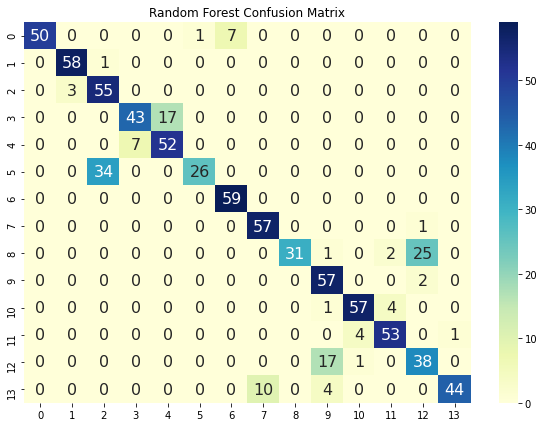

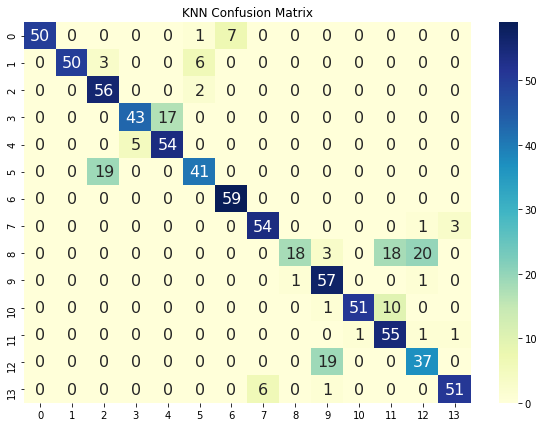

In [14]:
pred = rf.predict(X_unseen)
expect = Y_unseen
c_matrix = confusion_matrix(expect, pred)
df_cm = pd.DataFrame(c_matrix)
plt.figure(figsize=(10,7))
plt.title('Random Forest Confusion Matrix')
sn.heatmap(df_cm,annot=True, cmap="YlGnBu", annot_kws={"size":16})

pred = knn.predict(X_unseen)
expect = Y_unseen
c_matrix = confusion_matrix(expect, pred)
df_cm = pd.DataFrame(c_matrix)
plt.figure(figsize=(10,7))
plt.title('KNN Confusion Matrix')
sn.heatmap(df_cm,annot=True, cmap="YlGnBu", annot_kws={"size":16})

#### The inverse_transform of the label encoder allows raw values of y to be matched with their corresponding encoded values 

In [15]:
for i in range(14):
    print("The corresponding gesture of ", i , " in the confusion matrix relates to: ", le.inverse_transform([i]))

The corresponding gesture of  0  in the confusion matrix relates to:  ['LeftComeHere']
The corresponding gesture of  1  in the confusion matrix relates to:  ['LeftDrop']
The corresponding gesture of  2  in the confusion matrix relates to:  ['LeftFlatWave']
The corresponding gesture of  3  in the confusion matrix relates to:  ['LeftShake']
The corresponding gesture of  4  in the confusion matrix relates to:  ['LeftSwipe']
The corresponding gesture of  5  in the confusion matrix relates to:  ['LeftZoomInPalm']
The corresponding gesture of  6  in the confusion matrix relates to:  ['LeftZoomOut']
The corresponding gesture of  7  in the confusion matrix relates to:  ['RightComeHere']
The corresponding gesture of  8  in the confusion matrix relates to:  ['RightDrop']
The corresponding gesture of  9  in the confusion matrix relates to:  ['RightFlatWave']
The corresponding gesture of  10  in the confusion matrix relates to:  ['RightShake']
The corresponding gesture of  11  in the confusion mat

# 
# 
# The 2 classifiers are then used in a voting classifier which is to be trained:

+ hardVoteClf = Voting Classifier with hard voting 
+ hardVoteClfScore = A list of every voting classifier with hard voting score that is obtained in each fold of the cross validation technique 


In [16]:
hardVoteClf = VotingClassifier(estimators=[('rf', rf), ('knn', knn)], voting='hard')
hardVoteClfScore = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    hardVoteClf = hardVoteClf.fit(X_train, y_train)
    hardVoteClfres = hardVoteClf.score(X_test, y_test)
    hardVoteClfScore.append(hardVoteClfres)
    

#### The list of accuracies, the Mean and the Standard deviations of each of the trained voting classifiers are outputted below:

In [17]:
# Outputs Voting Classifier with hard vote Mean and Standard Deviation
print('\033[1m', "Voting Classifier with Hard Voting:", '\033[0m')
print(hardVoteClfScore)
standar = np.std(hardVoteClfScore)
print("\nStandard Deviation = %0.4f" % (standar))
meanVal = np.mean(hardVoteClfScore)
print("Mean Value is = %0.4f" % (meanVal), "\n\n")


 Voting Classifier with Hard Voting: 
[0.9745335350479072, 0.9737771053958648, 0.9722642460917801, 0.9740292486132123, 0.9697428139183056, 0.9732728189611699, 0.9742749054224464, 0.9692307692307692, 0.9725094577553594, 0.971500630517024]

Standard Deviation = 0.0018
Mean Value is = 0.9725 




#### The Testing of the models on unseen testing data can be seen below:
+ df_unseen = Dataframe which contains the unseen testing dataset values and their columns
+ X_unseen = Features in the unseen testing dataset which are used to predict the targets
+ Y_unseen = Classes/Targets in the unseen testing dataset which are to be predicted
+ Y_unseen_encoded = the encoded Y_unseen variable
+ min_max_scaler = Scales all feature values so that they are within the same range of 0 to 1 (normalising them)
+ le = Label Encoder used to encode the categorical values of the target
+ hard_vot_score_unseen = The accuracy that is obtained of the hard voting classifier classifying unseen data


In [19]:
df_unseen = pd.read_csv("../Study's Main Raw Datasets/TestingData.csv", names=col) 
df_unseen = pd.DataFrame(df_unseen.sample(frac=1, random_state=seed).reset_index(drop=True))  

Y_unseen = df_unseen.iloc[:, -1:]  
Y_unseen_encoded = le.fit_transform(Y_unseen)
Y_unseen = Y_unseen.values.ravel()
df_unseen.iloc[:, -1:] = le.fit_transform(df_unseen.iloc[:, -1:]) 

for cols in droppingColumns:
    df_unseen.drop(labels=cols, axis=1, inplace=True)
    
X_unseen = df_unseen 
X_unseen = min_max_scaler.fit_transform(X_unseen)

hard_vot_score_unseen = hardVoteClf.score(X_unseen, Y_unseen)

print("The score of the voting classifier with hard voting on unseen data:", np.around((100*hard_vot_score_unseen),decimals=2),"%")


The score of the voting classifier with hard voting on unseen data: 83.6 %


#### Confusion matrices of both voting clasifiers:

<AxesSubplot:title={'center':'Hard Voting Classifier Confusion Matrix'}>

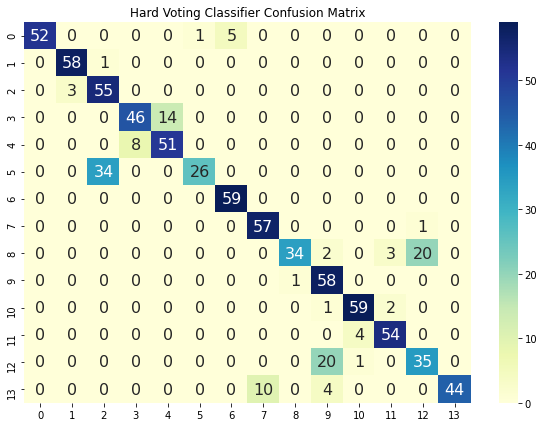

In [20]:
pred = hardVoteClf.predict(X_unseen)
expect = Y_unseen
c_matrix = confusion_matrix(expect, pred)
df_cm = pd.DataFrame(c_matrix)
plt.figure(figsize=(10,7))
plt.title('Hard Voting Classifier Confusion Matrix')
sn.heatmap(df_cm,annot=True, cmap="YlGnBu", annot_kws={"size":16})

# 
# 
# Voting Classifier Applied to multiple variations of the top 4 classifiers
These inlcude the KNN classifier, the voting classifier which previously obtained 84% accuracy, and the two random forest classifiers which both obtained 86%.

+ knn = K-nearest neighbour classifier which previously achieved 82% 
+ rf = The random forest which had hyperparameters produced by the optunas best_trial.params (86% accuracy)
+ rf2 = The random forest which was obtained using the trial and error approach using optunas graphs (86% accuracy)
+ vc = Hard Voting classifier which previously obtained 84%
+ hardVoteClf = Hard voting classifier which uses all of the previously stated classifiers above as estimators
+ hardVoteClfScore = A list of every voting classifier score that is obtained in each fold of the cross validation technique

In [21]:
knn = KNeighborsClassifier(n_neighbors=11)
rf = RandomForestClassifier(n_estimators=193, max_samples=0.10242244670584226, max_depth=1246, criterion='entropy', random_state=seed, n_jobs=-1)
rf2 = RandomForestClassifier(n_estimators=377, max_samples=0.1533258, max_depth=1058, criterion='entropy', random_state=seed, n_jobs=-1)
vc = hardVoteClf

hardVoteClf = VotingClassifier(estimators=[('rf', rf), ('knn', knn), ('rf2',rf2), ('vc', vc)], voting='hard')
hardVoteClfScore = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    hardVoteClf = hardVoteClf.fit(X_train, y_train)
    hardVoteClfres = hardVoteClf.score(X_test, y_test)
    hardVoteClfScore.append(hardVoteClfres)
      

#### The list of accuracies, the Mean and the Standard deviations of each of the trained voting classifiers are outputted below:

In [22]:
# Outputs Hard Voting Classifier Mean and Standard Deviation
print('\033[0m',"Voting Classifier with Hard Voting:", '\033[0m')
print(hardVoteClfScore)
standar = np.std(hardVoteClfScore)
print("\nStandard Deviation = %0.4f" % (standar))
meanVal = np.mean(hardVoteClfScore)
print("Mean Value is = %0.4f" % (meanVal))

 Voting Classifier with Hard Voting: 
[0.9712556732223904, 0.9697428139183056, 0.967725668179526, 0.9689863842662633, 0.9644478063540091, 0.9694906707009582, 0.9707440100882724, 0.964438839848676, 0.9699873896595208, 0.9667087011349307]

Standard Deviation = 0.0023
Mean Value is = 0.9684


#### The Testing of the models on unseen tesing data can be seen below:
+ df_unseen = Dataframe which contains the unseen testing dataset values and their columns
+ X_unseen = Features in the unseen testing dataset which are used to predict the targets
+ Y_unseen = Classes/Targets in the unseen testing dataset which are to be predicted
+ Y_unseen_encoded = the encoded Y_unseen variable
+ min_max_scaler = Scales all feature values so that they are within the same range of 0 to 1 (normalising them)
+ le = Label Encoder used to encode the categorical values of the target
+ hard_vot_score_unseen = The accuracy that is obtained of the hard voting classifier classifying unseen data

In [23]:
df_unseen = pd.read_csv("../Study's Main Raw Datasets/TestingData.csv", names=col) 
df_unseen = pd.DataFrame(df_unseen.sample(frac=1, random_state=seed).reset_index(drop=True))  

Y_unseen = df_unseen.iloc[:, -1:]  
Y_unseen = Y_unseen.values.ravel()
df_unseen.iloc[:, -1:] = le.fit_transform(df_unseen.iloc[:, -1:]) 

for cols in droppingColumns:
    df_unseen.drop(labels=cols, axis=1, inplace=True)
    
X_unseen = df_unseen 
X_unseen = min_max_scaler.fit_transform(X_unseen)

hard_vot_score_unseen = hardVoteClf.score(X_unseen, Y_unseen)

print("The score of the voting classifier with hard votin on unseen data:", np.around((100*hard_vot_score_unseen),decimals=2),"%")


The score of the voting classifier with hard votin on unseen data: 87.0 %


#### Confusion matrices of both voting clasifiers:

<AxesSubplot:title={'center':'Hard Voting Classifier Confusion Matrix'}>

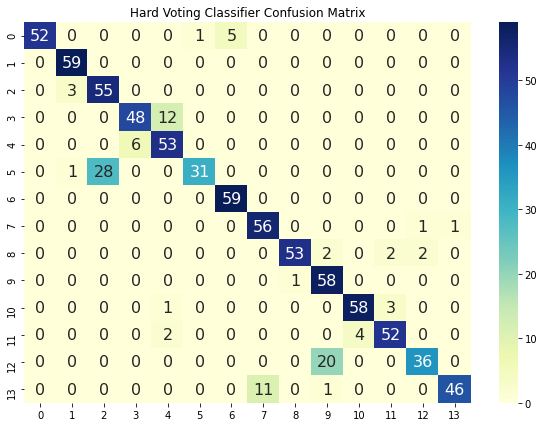

In [24]:
pred = hardVoteClf.predict(X_unseen)
expect = Y_unseen
c_matrix = confusion_matrix(expect, pred)
df_cm = pd.DataFrame(c_matrix)
plt.figure(figsize=(10,7))
plt.title('Hard Voting Classifier Confusion Matrix')
sn.heatmap(df_cm,annot=True, cmap="YlGnBu", annot_kws={"size":16})

# 
# 
# Saving the Model

In [26]:
import pickle

file = 'Final_Model.sav'
pickle.dump(hardVoteClf, open(file, 'wb'))


# 
# 
# Loading the Model

In [12]:
file = 'Final_Model.sav'
loaded_model = pickle.load(open(file, 'rb'))

trainingScoring = loaded_model.score(X_test, y_test)
print("This model scored ", 100*np.around(trainingScoring,decimals=2),"% on training")

unseenScoring = loaded_model.score(X_unseen, Y_unseen)
print("This model scored ", 100*np.around(unseenScoring,decimals=2),"% on unseen data")


This model scored  87.0 % on unseen data


### A comparison of the predictions next to their expected labels

In [28]:
ExamplesOfPredictions = loaded_model.predict(X_unseen)
ActualLabels = Y_unseen

zipped = zip(ExamplesOfPredictions, ActualLabels)

df = pd.DataFrame(zipped, columns = ['Prediction Made by classifier', 'Actual Label'])
df[138:148]


,Prediction Made by classifier,Actual Label
138,LeftDrop,LeftDrop
139,LeftShake,LeftShake
140,LeftZoomInPalm,LeftZoomInPalm
141,RightZoomOut,RightZoomOut
142,LeftDrop,LeftDrop
143,LeftSwipe,LeftSwipe
144,LeftFlatWave,LeftZoomInPalm
145,RightComeHere,RightComeHere
146,RightComeHere,RightZoomOut
147,RightZoomInPalm,RightZoomInPalm


#### The following cell shows the ability of the model predicting data which is provided directly, illustrating how it would work when in real-time

In [38]:
arr = np.array([0.50000528, 0.50339356, 0.45626128, 0.43325177, 0.5196012, 0.53255083, 0.48669132, 0.29272283, 0.301256, 0.54163251, 0.55074482, 0.16569175, 0.50297508, 0.50032473, 0.16569175, 0.18437283, 0.51627502, 0.50080604, 0.18437283, 0.19660836, 0.50003337, 0.49997399, 0.54163251, 0.55074482, 0.16569175,
       0.50297508, 0.50032473, 0.16569175, 0.18437283, 0.51627502, 0.50080604, 0.18437283, 0.19660836, 0.50003337, 0.49997399, 0.54163251, 0.55074482, 0.16569175, 0.50297508, 0.50032473, 0.16569175, 0.18437283, 0.51627502, 0.50080604, 0.18437283,
       0.19660836, 0.50003337, 0.49997399, 0.54163251, 0.55074482, 0.16569175, 0.50297508, 0.50032473, 0.16569175, 0.18437283, 0.51627502, 0.50080604, 0.18437283, 0.19660836, 0.50003337, 0.49997399, 0.54163251, 0.55074482, 0.16569175, 0.50297508,
       0.50032473, 0.16569175, 0.18437283, 0.51627502, 0.50080604, 0.18437283, 0.19660836, 0.50003337, 0.49997399, 0.99073431, 0.3690987 , 0.53446395, 0.35698025, 0.6211975 , 0.49337003, 0.53828335, 0.4239516 , 0.47838169, 0.19489643, 0.4948247 ,
       0.26356768, 0.19489643, 0.18493927, 0.04034411, 0.18493927, 0.19067419, 0.05444904, 0.19489643, 0.4948247 , 0.26356768, 0.19489643, 0.18493927, 0.04034411, 0.18493927, 0.19067419, 0.05444904, 0.19489643, 0.4948247 , 0.26356768, 0.19489643,
       0.18493927, 0.04034411, 0.18493927, 0.19067419, 0.05444904, 0.19489643, 0.4948247 , 0.26356768, 0.19489643, 0.18493927, 0.04034411, 0.18493927, 0.19067419, 0.05444904, 0.19489643, 0.4948247 , 0.26356768, 0.19489643, 0.18493927, 0.04034411,
       0.18493927, 0.19067419, 0.05444904])            

arr = arr.reshape(1, -1)

lbl = ["RightZoomOut"]

pred = loaded_model.predict(arr)
print("The predicted class is:", pred)
print(np.around(100*(loaded_model.score(arr, lbl))), "% accurately recognised")

The predicted class is: ['RightZoomOut']
100.0 % accurately recognised
